# Ghana Covid-19 Daily Case Analysis
The aim of this analysis is to access the impactof all the work that was  put into preventing the spread of the virus like the lockdown,mandatory mask wearing, social distancing etc.Did they really pay back as a way of reduction in cases and casualties?
Data is taken from March - November 2020

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
gh_covid = pd.read_csv('datasets/Ghana_Covid19_DailyActive.csv')

In [4]:
gh_covid_df = gh_covid.copy()
gh_covid_df

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
0,2,0,0,03/12/2020,2,0,0,2
1,2,0,0,03/13/2020,4,0,0,4
2,2,0,0,03/14/2020,6,0,0,6
3,1,0,0,03/17/2020,7,0,0,7
4,2,0,0,03/18/2020,9,0,0,9
...,...,...,...,...,...,...,...,...
228,49,78,0,11/23/2020,51274,50205,323,746
229,105,93,0,11/24/2020,51379,50298,323,758
230,97,60,0,11/25/2020,51476,50358,323,795
231,93,92,0,11/26/2020,51569,50450,323,796


# Preparation and cleaning

In [5]:
gh_covid_df.columns

Index(['confirmed', 'recovered', 'death', 'date', 'cumulative_confirmed ',
       'cumulative_recovered', 'cumulative_death', 'active_cases'],
      dtype='object')

In [6]:
gh_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   confirmed              233 non-null    int64 
 1   recovered              233 non-null    int64 
 2   death                  233 non-null    int64 
 3   date                   233 non-null    object
 4   cumulative_confirmed   233 non-null    int64 
 5   cumulative_recovered   233 non-null    int64 
 6   cumulative_death       233 non-null    int64 
 7   active_cases           233 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 13.7+ KB


In [7]:
gh_covid_df.describe()

,confirmed,recovered,death,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,221.746781,216.939914,1.386266,28642.167382,26223.437768,174.386266,2244.343348
std,241.394370,441.662539,2.569077,19231.469481,20028.783253,124.097661,2066.144590
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
25%,59.000000,32.000000,0.000000,8070.000000,2947.000000,36.000000,524.000000
50%,131.000000,97.000000,0.000000,35501.000000,32096.000000,182.000000,1384.000000
75%,295.000000,221.000000,2.000000,46626.000000,45757.000000,301.000000,3782.000000
max,1513.000000,5526.000000,15.000000,51667.000000,50547.000000,323.000000,8585.000000


In [8]:
gh_covid_df.isna()

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
228,False,False,False,False,False,False,False,False
229,False,False,False,False,False,False,False,False
230,False,False,False,False,False,False,False,False
231,False,False,False,False,False,False,False,False


In [9]:
gh_covid_df

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
0,2,0,0,03/12/2020,2,0,0,2
1,2,0,0,03/13/2020,4,0,0,4
2,2,0,0,03/14/2020,6,0,0,6
3,1,0,0,03/17/2020,7,0,0,7
4,2,0,0,03/18/2020,9,0,0,9
...,...,...,...,...,...,...,...,...
228,49,78,0,11/23/2020,51274,50205,323,746
229,105,93,0,11/24/2020,51379,50298,323,758
230,97,60,0,11/25/2020,51476,50358,323,795
231,93,92,0,11/26/2020,51569,50450,323,796


# Exploratory Data Analysis

In [10]:
#highest cases recorded in a day
gh_covid_df.confirmed.max()

1513

In [11]:
#The day this high cases was recorded
gh_covid_df[gh_covid_df.confirmed == 1513]

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
117,1513,1269,0,07/30/2020,37014,33365,182,3467


In [12]:
#minimum mumber of cases
gh_covid_df.confirmed.min()

1

In [13]:
#getting the day(s)
gh_covid_df[gh_covid_df.confirmed == 1]

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
3,1,0,0,03/17/2020,7,0,0,7
19,1,0,0,04/03/2020,205,3,5,197


In [14]:
#highest number of deaths in a day
gh_covid_df.death.max()

15

In [15]:
#Day
gh_covid_df[gh_covid_df.death == 15]

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
77,514,5526,15,06/18/2020,13717,10074,85,3558


In [16]:
#highest number of recoveries
gh_covid_df.recovered.max()

5526

In [17]:
#on the same day we had the highest number of deaths, we also had the highest number of recoveries

In [18]:
#average number of cases 
gh_covid_df.confirmed.mean()

221.74678111587983

In [19]:
#average number of deaths
gh_covid_df.death.mean()

1.386266094420601

In [20]:
#average number of recoveries
gh_covid_df.recovered.mean()

216.93991416309012

In [21]:
gh_covid_df.date

0      03/12/2020
1      03/13/2020
2      03/14/2020
3      03/17/2020
4      03/18/2020
          ...    
228    11/23/2020
229    11/24/2020
230    11/25/2020
231    11/26/2020
232    11/27/2020
Name: date, Length: 233, dtype: object

In [22]:
gh_covid_df['date'] = pd.to_datetime(gh_covid_df.date)

In [23]:
gh_covid_df.date

0     2020-03-12
1     2020-03-13
2     2020-03-14
3     2020-03-17
4     2020-03-18
         ...    
228   2020-11-23
229   2020-11-24
230   2020-11-25
231   2020-11-26
232   2020-11-27
Name: date, Length: 233, dtype: datetime64[ns]

In [24]:
#adding new columns for month, day and weekdays
gh_covid_df['Month'] = pd.DatetimeIndex(gh_covid_df.date).month
gh_covid_df['Day'] = pd.DatetimeIndex(gh_covid_df.date).day
gh_covid_df['Weekday'] = pd.DatetimeIndex(gh_covid_df.date).weekday

In [25]:
gh_covid_df

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases,Month,Day,Weekday
0,2,0,0,2020-03-12,2,0,0,2,3,12,3
1,2,0,0,2020-03-13,4,0,0,4,3,13,4
2,2,0,0,2020-03-14,6,0,0,6,3,14,5
3,1,0,0,2020-03-17,7,0,0,7,3,17,1
4,2,0,0,2020-03-18,9,0,0,9,3,18,2
...,...,...,...,...,...,...,...,...,...,...,...
228,49,78,0,2020-11-23,51274,50205,323,746,11,23,0
229,105,93,0,2020-11-24,51379,50298,323,758,11,24,1
230,97,60,0,2020-11-25,51476,50358,323,795,11,25,2
231,93,92,0,2020-11-26,51569,50450,323,796,11,26,3


In [26]:
#month with the highest number of cases
gh_covid_df.groupby('Month')['confirmed'].max()

Month
3       64
4      403
5      921
6      609
7     1513
8      689
9      176
10     311
11     270
Name: confirmed, dtype: int64

In [27]:
#Month with the highest number of deaths
gh_covid_df.groupby('Month')['death'].max()

Month
3      1
4      5
5      4
6     15
7      9
8      9
9      4
10     4
11     2
Name: death, dtype: int64

In [28]:
gh_covid_df.groupby('Month')['recovered'].max()

Month
3        2
4       79
5      786
6     5526
7     1652
8     1064
9      185
10     165
11     232
Name: recovered, dtype: int64

In [29]:
gh_covid_df.groupby('Weekday')['confirmed'].max()

Weekday
0     736
1     691
2    1254
3    1513
4     992
5     891
6     854
Name: confirmed, dtype: int64

In [30]:
gh_covid_df.groupby('Weekday')['confirmed'].min()

Weekday
0    3
1    1
2    2
3    2
4    1
5    2
6    3
Name: confirmed, dtype: int64

# Visualizations


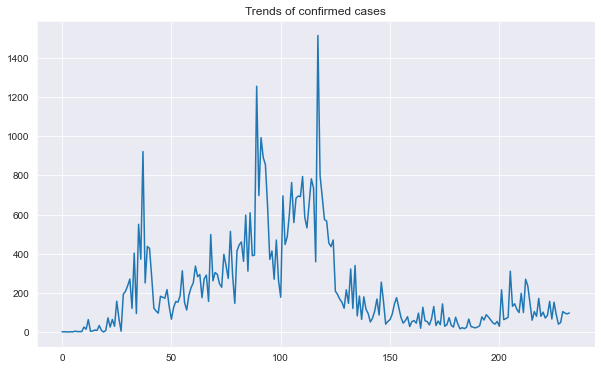

In [31]:
#plot for number confirmed
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.plot(gh_covid_df.confirmed);
plt.title('Trends of confirmed cases');

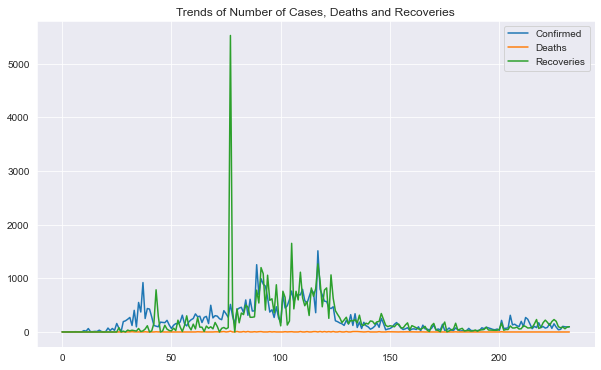

In [32]:
plt.figure(figsize=(10,6))
plt.plot(gh_covid_df.confirmed);
plt.plot(gh_covid_df.death);
plt.plot(gh_covid_df.recovered);
plt.title("Trends of Number of Cases, Deaths and Recoveries");
plt.legend(['Confirmed','Deaths','Recoveries']);

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
sns.set_style('darkgrid')

In [35]:
gh_covid_df

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases,Month,Day,Weekday
0,2,0,0,2020-03-12,2,0,0,2,3,12,3
1,2,0,0,2020-03-13,4,0,0,4,3,13,4
2,2,0,0,2020-03-14,6,0,0,6,3,14,5
3,1,0,0,2020-03-17,7,0,0,7,3,17,1
4,2,0,0,2020-03-18,9,0,0,9,3,18,2
...,...,...,...,...,...,...,...,...,...,...,...
228,49,78,0,2020-11-23,51274,50205,323,746,11,23,0
229,105,93,0,2020-11-24,51379,50298,323,758,11,24,1
230,97,60,0,2020-11-25,51476,50358,323,795,11,25,2
231,93,92,0,2020-11-26,51569,50450,323,796,11,26,3


In [85]:
#month by month confirmed cases visualization
gh_monthly_df = gh_covid_df.groupby('Month')[['confirmed','recovered','death']].sum()
gh_monthly_df

,confirmed,recovered,death
Month,,,
3,161,3,5
4,1913,209,12
5,6223,2774,21
6,9837,10564,79
7,19678,20763,74
8,6846,9165,85
9,2145,2528,27
10,1708,1366,17
11,3156,3175,3


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


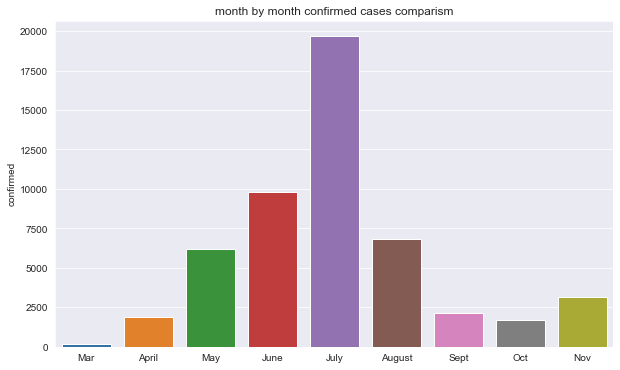

In [151]:
plt.figure(figsize=(10,6));
plt.title('month by month confirmed cases comparism');
months=['Mar','April','May','June','July','August','Sept','Oct','Nov']
sns.barplot(months,gh_monthly_df.confirmed);

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


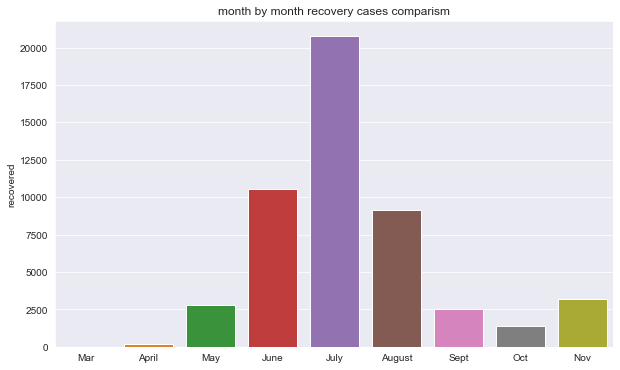

In [86]:
plt.figure(figsize=(10,6));
plt.title('month by month recovery cases comparism');
months=['Mar','April','May','June','July','August','Sept','Oct','Nov']
sns.barplot(months,gh_monthly_df.recovered);

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


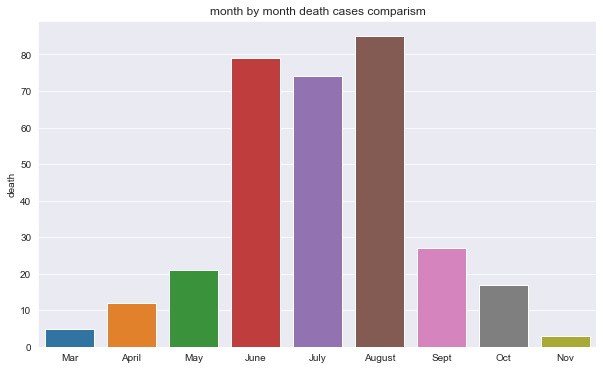

In [96]:
plt.figure(figsize=(10,6));
plt.title('month by month death cases comparism');
months=['Mar','April','May','June','July','August','Sept','Oct','Nov']
sns.barplot(months,gh_monthly_df.death);

In [80]:
weekly_df = gh_covid_df.groupby('Weekday')[['confirmed','recovered','death']].sum()
weekly_df

,confirmed,recovered,death
Weekday,,,
0,7613,6614,44
1,6478,6004,46
2,6793,5714,40
3,8774,12362,60
4,6890,8645,57
5,7876,5376,30
6,7243,5832,46


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


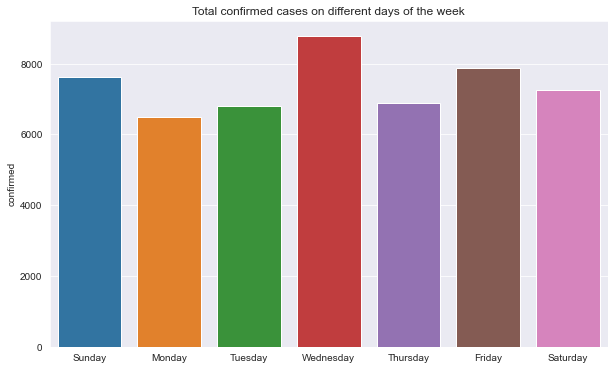

In [84]:
weekdays = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.figure(figsize=(10,6))
plt.title('Total confirmed cases on different days of the week')
sns.barplot(weekdays,weekly_df.confirmed);

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


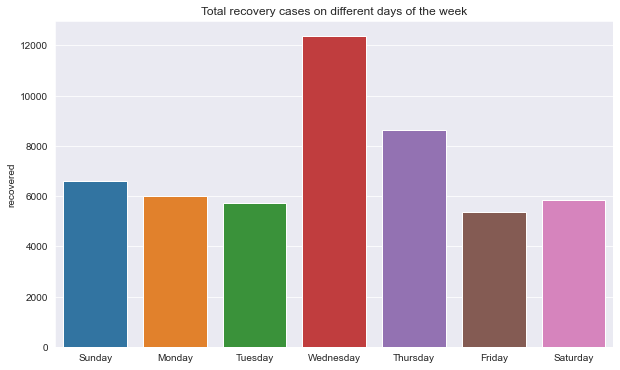

In [90]:
weekdays = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.figure(figsize=(10,6))
plt.title('Total recovery cases on different days of the week')
sns.barplot(weekdays,weekly_df.recovered);

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


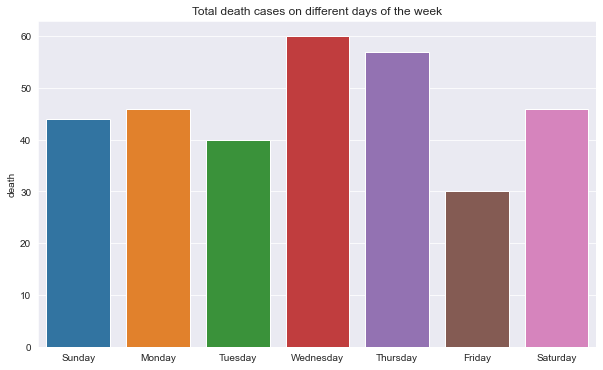

In [97]:
weekdays = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.figure(figsize=(10,6))
plt.title('Total death cases on different days of the week')
sns.barplot(weekdays,weekly_df.death);

In [98]:
#lockdown started on the 28th of march
#Mandatory nose mask started on 06th of may


# Analyzing the impact of the preventory Measures
Lockdown started on the 28th of march and was eased on 31st May. Mandatory nose mask started on 06th of may till date

In [99]:
gh_covid_df

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases,Month,Day,Weekday
0,2,0,0,2020-03-12,2,0,0,2,3,12,3
1,2,0,0,2020-03-13,4,0,0,4,3,13,4
2,2,0,0,2020-03-14,6,0,0,6,3,14,5
3,1,0,0,2020-03-17,7,0,0,7,3,17,1
4,2,0,0,2020-03-18,9,0,0,9,3,18,2
...,...,...,...,...,...,...,...,...,...,...,...
228,49,78,0,2020-11-23,51274,50205,323,746,11,23,0
229,105,93,0,2020-11-24,51379,50298,323,758,11,24,1
230,97,60,0,2020-11-25,51476,50358,323,795,11,25,2
231,93,92,0,2020-11-26,51569,50450,323,796,11,26,3


In [100]:
#finding the beginning of the lockdown in the table
gh_covid_df[gh_covid_df.date == '2020-03-28']

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases,Month,Day,Weekday
14,6,0,1,2020-03-28,141,2,5,134,3,28,5


In [101]:
#finding the the date the lockdown was eased in the table
gh_covid_df[gh_covid_df.date == '2020-05-31']

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases,Month,Day,Weekday
59,227,39,2,2020-05-31,8297,2986,38,5273,5,31,6


In [103]:
#getting a dataframe of the data recorded from the beginning to the easing of the lockdown
lockdown_days_df = gh_covid_df.loc[14:59]
lockdown_days_df

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases,Month,Day,Weekday
14,6,0,1,2020-03-28,141,2,5,134,3,28,5
15,11,0,0,2020-03-29,152,2,5,145,3,29,6
16,9,1,0,2020-03-31,161,3,5,153,3,31,1
17,34,0,0,2020-04-01,195,3,5,187,4,1,2
18,9,0,0,2020-04-02,204,3,5,196,4,2,3
19,1,0,0,2020-04-03,205,3,5,197,4,3,4
20,9,0,0,2020-04-04,214,3,5,206,4,4,5
21,73,0,0,2020-04-06,287,3,5,279,4,6,0
22,26,0,0,2020-04-07,313,3,5,305,4,7,1
23,65,1,1,2020-04-09,378,4,6,368,4,9,3


In [123]:
#the highest case recorded in lockdown
lockdown_days_df.confirmed.mean()

177.43478260869566

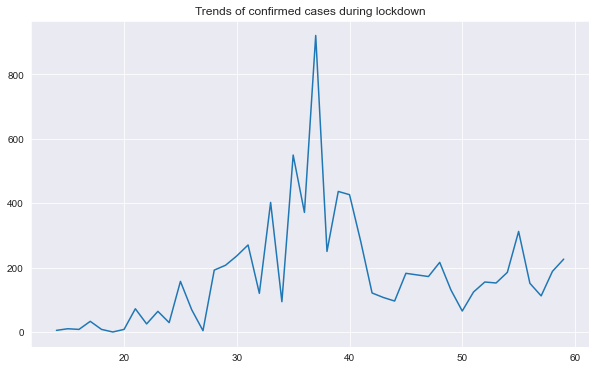

In [104]:
#line graph
plt.figure(figsize=(10,6));
plt.plot(lockdown_days_df.confirmed);
plt.title('Trends of confirmed cases during lockdown');

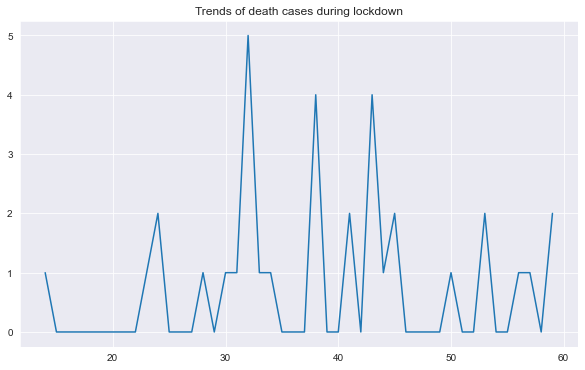

In [118]:
#line grapgh
plt.figure(figsize=(10,6));
plt.plot(lockdown_days_df.death);
plt.title('Trends of death cases during lockdown');

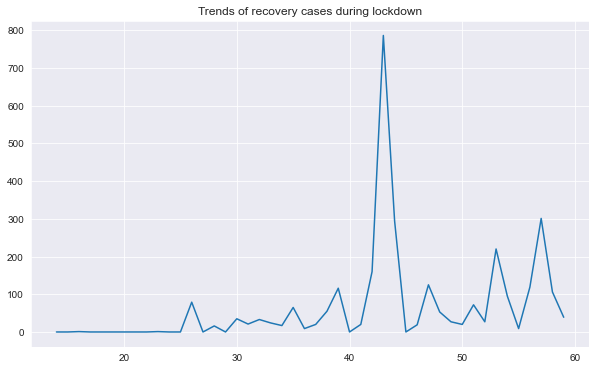

In [117]:
#line grapgh
plt.figure(figsize=(10,6));
plt.plot(lockdown_days_df.recovered);
plt.title('Trends of recovery cases during lockdown');

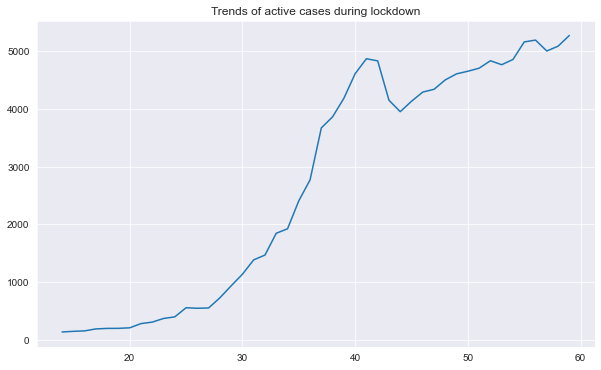

In [142]:
#line grapgh
plt.figure(figsize=(10,6));
plt.plot(lockdown_days_df.active_cases);
plt.title('Trends of active cases during lockdown');

In [109]:
after_lockdown_df = gh_covid_df.loc[60:232]

In [121]:
#what was the highest case after lockdown?
after_lockdown_df.confirmed.max()

1513

In [122]:
#what was the lowest case after lockdown?
after_lockdown_df.confirmed.min()

17

In [124]:
#what was the average no of cases confirmed after lockdown?
after_lockdown_df.confirmed.mean()

250.6936416184971

In [127]:
#what was the highest number of recoveries after lockdown?
after_lockdown_df.recovered.max()

5526

In [128]:
#what was the lowest number of recoveries ?
after_lockdown_df.recovered.min()

0

In [129]:
#what was the average number of recoveries?
after_lockdown_df.recovered.mean()

274.91907514450867

In [135]:
#what was the highest number of deaths after lockdown?
after_lockdown_df.death.max()

15

In [136]:
#what was the least number of death?
after_lockdown_df.death.min()

0

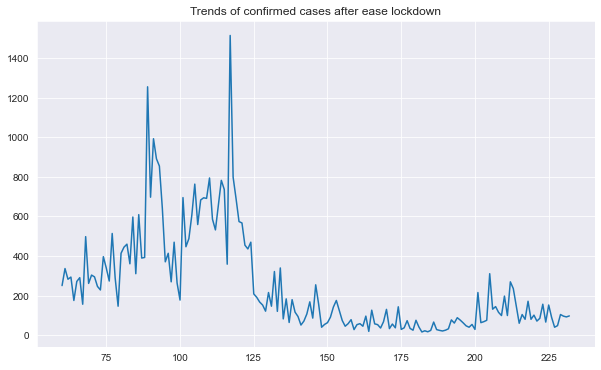

In [131]:
#line grapgh
plt.figure(figsize=(10,6));
plt.plot(after_lockdown_df.confirmed);
plt.title('Trends of confirmed cases after ease lockdown');

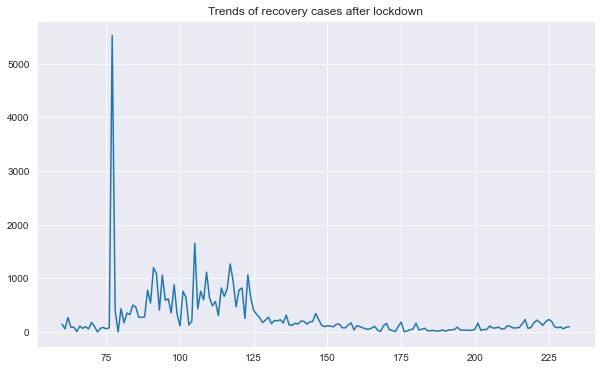

In [132]:
#line grapgh
plt.figure(figsize=(10,6));
plt.plot(after_lockdown_df.recovered);
plt.title('Trends of recovery cases after lockdown');

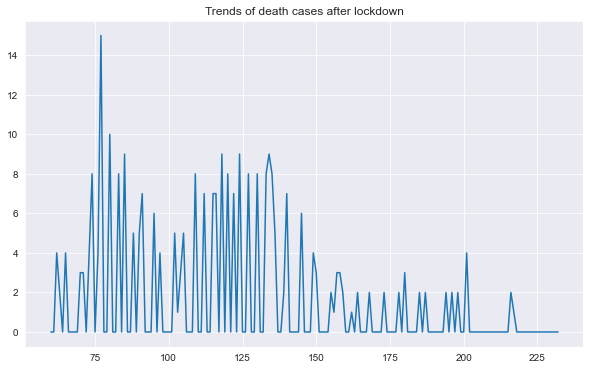

In [143]:
#line grapgh
plt.figure(figsize=(10,6));
plt.plot(after_lockdown_df.death);
plt.title('Trends of death cases after lockdown');

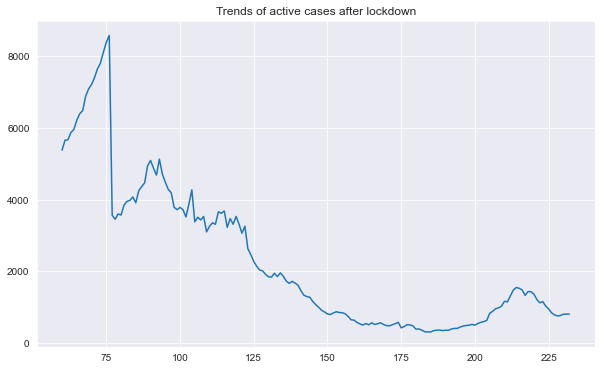

In [144]:
#line grapgh
plt.figure(figsize=(10,6));
plt.plot(after_lockdown_df.active_cases);
plt.title('Trends of active cases after lockdown');

In [137]:
#after mandatory wearing of nose masks and social distancing

In [138]:
#getting the index for the beginning of the mandatory wearing of  nose mask
gh_covid_df[gh_covid_df.date == '2020-05-06']

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases,Month,Day,Weekday


In [139]:
"""per the data provided, there was no data reported on the 05 and 06th 0f may. This is mostly a human error on the side of the 
individual who entered or collected the data. so we will continue from 7th"""

'per the data provided, there was no data reported on the 05 and 06th 0f may. This is mostly a human error on the side of the \nindividual who entered or collected the data. so we will continue from 7th'

In [141]:
after_mandatory_df = gh_covid_df.loc[37:]
after_mandatory_df

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases,Month,Day,Weekday
37,921,20,0,2020-05-07,4012,323,18,3671,5,7,3
38,251,55,4,2020-05-08,4263,378,22,3863,5,8,4
39,437,116,0,2020-05-10,4700,494,22,4184,5,10,6
40,427,0,0,2020-05-11,5127,494,22,4611,5,11,0
41,281,20,2,2020-05-12,5408,514,24,4870,5,12,1
...,...,...,...,...,...,...,...,...,...,...,...
228,49,78,0,2020-11-23,51274,50205,323,746,11,23,0
229,105,93,0,2020-11-24,51379,50298,323,758,11,24,1
230,97,60,0,2020-11-25,51476,50358,323,795,11,25,2
231,93,92,0,2020-11-26,51569,50450,323,796,11,26,3


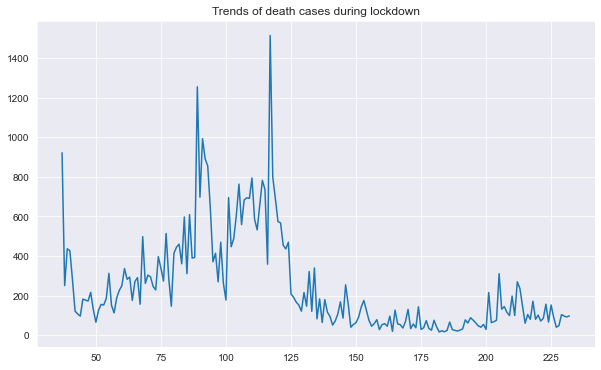

In [148]:
plt.figure(figsize=(10,6));
plt.plot(after_mandatory_df.confirmed);
plt.title('Trends of death cases during lockdown');

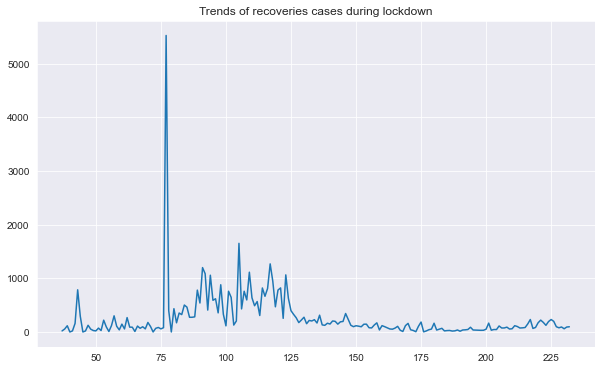

In [152]:
plt.figure(figsize=(10,6));
plt.plot(after_mandatory_df.recovered);
plt.title('Trends of recoveries cases during lockdown');

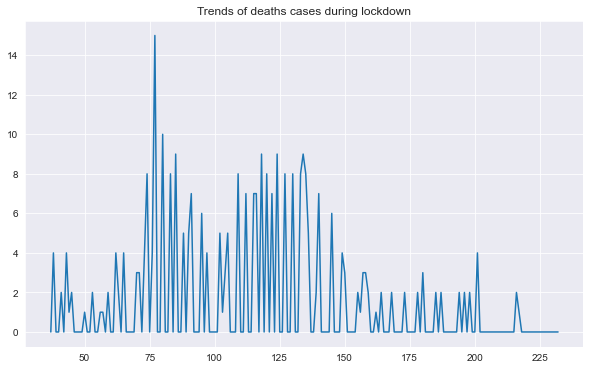

In [153]:
plt.figure(figsize=(10,6));
plt.plot(after_mandatory_df.death);
plt.title('Trends of deaths cases during lockdown');

# Summary of some charts for the lockdown data and the data after lockdown

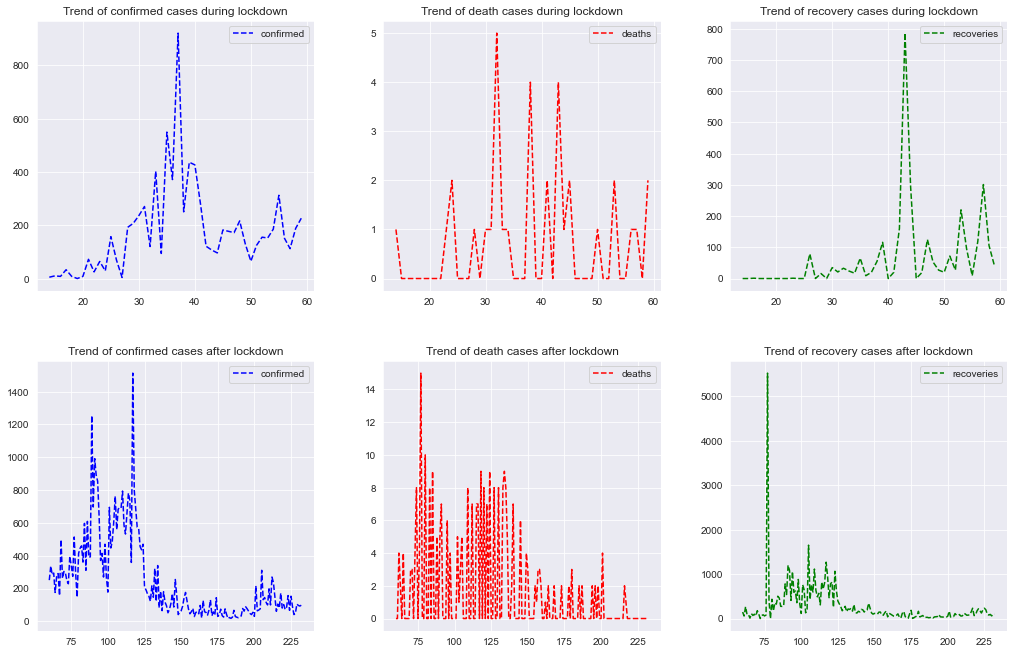

In [173]:
fig, axes = plt.subplots(2,3, figsize=(15,10));
#the plots above will represent data during lockdown and the plots on the second row represent data after lockdown

#confirmed cases during lockdown
axes[0,0].plot(lockdown_days_df.confirmed,'b--');
axes[0,0].set_title('Trend of confirmed cases during lockdown')
axes[0,0].legend(['confirmed'])

#Death cases during lockdown
axes[0,1].plot(lockdown_days_df.death,'r--');
axes[0,1].set_title('Trend of death cases during lockdown')
axes[0,1].legend(['deaths'])

#confirmed cases during lockdown
axes[0,2].plot(lockdown_days_df.recovered,'g--');
axes[0,2].set_title('Trend of recovery cases during lockdown')
axes[0,2].legend(['recoveries'])


#confirmed cases during lockdown
axes[1,0].plot(after_lockdown_df.confirmed,'b--');
axes[1,0].set_title('Trend of confirmed cases after lockdown')
axes[1,0].legend(['confirmed'])

#Death cases during lockdown
axes[1,1].plot(after_lockdown_df.death,'r--');
axes[1,1].set_title('Trend of death cases after lockdown')
axes[1,1].legend(['deaths'])

#confirmed cases during lockdown
axes[1,2].plot(after_lockdown_df.recovered,'g--');
axes[1,2].set_title('Trend of recovery cases after lockdown')
axes[1,2].legend(['recoveries'])

plt.tight_layout(pad=4);

# Conclusions and Inferences
The conclusions drawn are purely depended on the data used for this analysis. Other factors could have influenced the nature
of the analysis.

The highest case per day recorded over the period this data was 1513 on the 30th of July. Highest deaths in a day was 15 on
the 18th of June. The highest number of recoveries per day was 5526 on the 18th of June.
Monthwise, July had the highest number of cases, highest number of deaths was recorded in  june.

The impact of the the lockdown was very magnificent considering the data provided for days the lockdown lasted. Confirmed cases and deaths were relatively low during this time and the number of recovered cases was encouraging as well. The lowest number of
confirmed cases in a day during the lockdown was 1(case). The highest number of cases recorded was 912 which is relatively low 
compared to other numbers outside this period.Recovered cases rised till 786 in one day.

After lockdown was eased, confirmed cases started rising significantly with the least number cases recorded per day being 17 and the highest number of cases recorded in a day was 1513, which happened to be the highest for 2020 (therefore the peak for 2020).

Recoveries started rising as well. This could be attributed to the rising numbers of confirmed cases(the more cases are confirmed, the more recoveries will be recorded as well). The highest recovery per day was 5526 and the least being 0.

After lockdown was eased, the number of deaths fluctuated between high and low numbers(as can be seen in the graph) but he highest number of deaths(i.e 15) recorded in a day was recorded in this period. This can also be attributed to the very high numbers of confirmed cases.

From the data, it appears that the mandatory wearing of face masks which was imposed on the 6th May did not have much impact as a preventive measure as confirmed cases continued to rise significantly. The measure was a very good but the main reason for the impact being less is the fact that a few weeks after the measure was taken, lockdown was eased. Majority of the people where blatantly flouting the measure for different reasaons.